
# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset which has been analyzed in this notebook contains information about nearly 10,000 movies collected from The Movie Database (TMDb). each row correspondends to a movie and includes a range of data about each movie. relevant data to be used in the following analysis includes the following variables:

    -origieal_title
    -geners
    -release_year
    -budget_adj
    -revenue_adj

in this report we will try to answer these questions:

    1- Does being a high budget movie mean having high popularity?
    2- Which genres are most popular from decade to decade?



In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset conatins 21 columns and 10866 rows before any cleaning.


### Data Cleaning 

In [10]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


by looking at the statistics, there are some columns that have a minimum of zero (budget, revenue, and runtime) so we will drop these cases, so they don't affect our analysis. (drop the outliers)


In [11]:
df_zero_budget = df.query("budget == 0")
df.drop(df_zero_budget.index, inplace=True)
df_zero_revenue = df.query("revenue == 0")
df.drop(df_zero_revenue.index, inplace=True)
df_zero_runtime = df.query("runtime == 0")
df.drop(df_zero_runtime.index, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# release_date column needs to be converted to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
# Check for duplicates in the rows
sum(df.duplicated())

1

In [16]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-

<a id='eda'></a>
## Exploratory Data Analysis

### Does being a high budget movie mean having high popularity?


Text(0.5,1,'Budget vs. Popularity')

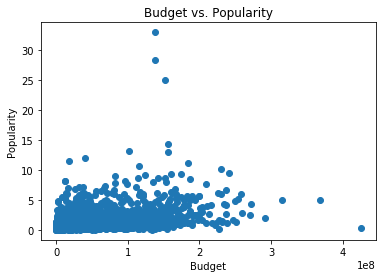

In [17]:
plt.scatter(df['budget_adj'],df['popularity'])
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.title("Budget vs. Popularity")


We can see that there is a positive correlation between the budget and popularity. So, yes, the budget affects the popularity but not all the times. As we can see some movies have high budget but low popularity. We can further compute the coefficient of correlation with its p-value to prove that as it shows to us how strong is the relation between these two variables.



In [18]:
sp.stats.pearsonr(df['popularity'], df['budget_adj'])


(0.39935581849026325, 1.5192158270413116e-147)

As we can see from the correlation coefficient, the relation between popularity and budget is weak and positive (+0.399).



### Which genres are most popular from decade to decade?


In [19]:
df['genres'].value_counts() 


Drama                                       245
Comedy                                      233
Drama|Romance                               107
Comedy|Romance                              104
Comedy|Drama|Romance                         91
Comedy|Drama                                 88
Horror|Thriller                              81
Horror                                       58
Drama|Thriller                               48
Action|Thriller                              39
Crime|Drama|Thriller                         37
Drama|Comedy                                 36
Comedy|Family                                32
Action|Crime|Thriller                        31
Drama|History                                28
Drama|Crime                                  27
Crime|Drama                                  26
Action|Crime|Drama|Thriller                  25
Drama|Comedy|Romance                         25
Thriller                                     25
Comedy|Crime                            

as we can see, We have a problem here that a film can have multiple genres separated by '|' so we will need to split these into multiple rows to be able to answer this question.



In [20]:
df_genres = pd.DataFrame(df.genres.str.split('|').tolist(), index=[df.release_year]).stack()
df_genres = df_genres.reset_index([0])
df_genres.rename(columns={0:"genres"},inplace=True)
df_genres.head()

,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
0,2015,Action


In [21]:
df_genres['release_year'].describe()


count    10303.000000
mean      2000.921867
std         11.277350
min       1960.000000
25%       1995.000000
50%       2004.000000
75%       2010.000000
max       2015.000000
Name: release_year, dtype: float64

In [23]:
#It is better to discover the most popular genres over decades not over years.

df_genres_1960s = df_genres.query("release_year >= 1960 & release_year < 1970")
df_genres_1970s = df_genres.query("release_year >= 1970 & release_year < 1980")
df_genres_1980s = df_genres.query("release_year >= 1980 & release_year < 1990")
df_genres_1990s = df_genres.query("release_year >= 1990 & release_year < 2000")
df_genres_2000s = df_genres.query("release_year >= 2000 & release_year < 2010")
df_genres_2010s = df_genres.query("release_year >= 2010 & release_year < 2020")


Text(0.5,1,'Genres Frequncy for 2010s')

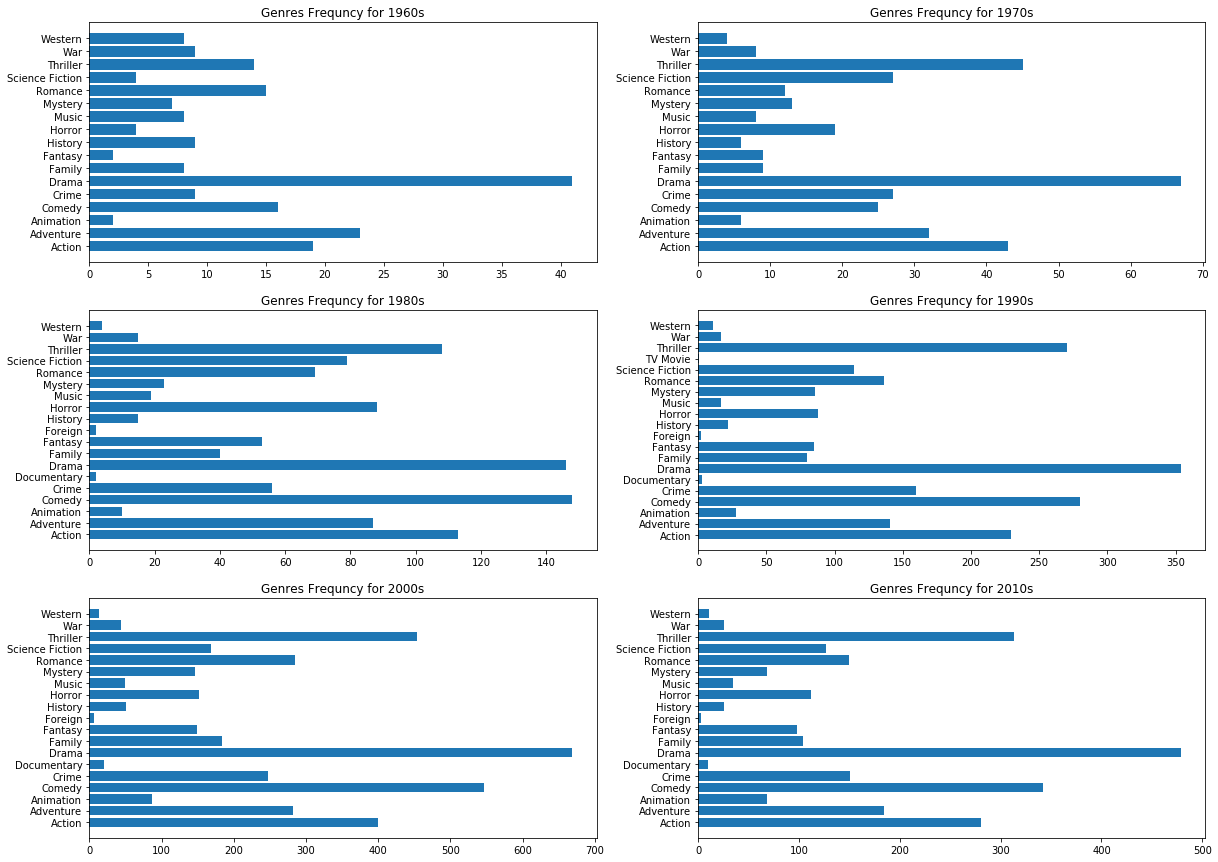

In [24]:
# Creating subplots for each decades
# Used the method in this link to help me: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
axs[0,0].barh(df_genres_1960s.genres.value_counts().index,df_genres_1960s.genres.value_counts().values)
axs[0,0].set_title("Genres Frequncy for 1960s")
axs[0,1].barh(df_genres_1970s.genres.value_counts().index,df_genres_1970s.genres.value_counts().values)
axs[0,1].set_title("Genres Frequncy for 1970s")
axs[1,0].barh(df_genres_1980s.genres.value_counts().index,df_genres_1980s.genres.value_counts().values)
axs[1,0].set_title("Genres Frequncy for 1980s")
axs[1,1].barh(df_genres_1990s.genres.value_counts().index,df_genres_1990s.genres.value_counts().values)
axs[1,1].set_title("Genres Frequncy for 1990s")
axs[2,0].barh(df_genres_2000s.genres.value_counts().index,df_genres_2000s.genres.value_counts().values)
axs[2,0].set_title("Genres Frequncy for 2000s")
axs[2,1].barh(df_genres_2010s.genres.value_counts().index,df_genres_2010s.genres.value_counts().values)
axs[2,1].set_title("Genres Frequncy for 2010s")


These plots give a nice idea about the most popular genres from decade to decade. We can see that "Drama" stood over decades as the most popular genre except for the 1980s as "Comedy" took its place but then "Drama" restored the first place again in the 1990s and onwards.



<a id='conclusions'></a>
## Conclusions

### Summery
There is a weak correlation between budget and popularity which means having a higher budget doesn't necessarily mean that the movie will have a higher popularity score.

Drama genre is the most popular over the decades for 1960s till 2010s except for 1980s.

### Limitations:

We don't know if the sampling method used to collect this data was random sampling or not which weakens our ability to make generalizations about the population of study.

Some variables like (budget, revenue, and runtime) had a minimum of zero so we considered them as outliers and they were better to be dropped to get more accurate results.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0